**Cálculos en Arrays: Broadcasting**

Vimos en la sección anterior cómo las funciones universales de NumPy pueden ser utilizadas para vectorizar operaciones y así eliminar bucles lentos de Python. Otro método para vectorizar operaciones es utilizar la funcionalidad de broadcasting de NumPy. El broadcasting es simplemente un conjunto de reglas para aplicar funciones binarias (como adición, resta, multiplicación, etc.) en arrays de diferentes tamaños.

**Introducción al Broadcasting**

* Recuerda que para arrays del mismo tamaño, las operaciones binarias se realizan de manera elemento por elemento:

In [43]:
import numpy as np

a = np.array(range(0,3))
b = np.array([5,5,5])
a + b

array([5, 6, 7])

El Broadcasting permite que estos tipos de operaciones binarias se realicen en arrays de diferentes tamaños; por ejemplo, podemos agregar fácilmente un escalar (piénsalo como un array de dimensión cero) a un array:

In [44]:
a + 5

array([5, 6, 7])

Podemos pensar en esta operación como una que estira o duplica el valor 5 en el array [5, 5, 5] y luego suma los resultados. La ventaja del broadcasting en NumPy es que esta duplicación de valores no ocurre realmente, pero es un modelo mental útil mientras pensamos en el broadcasting.

Podemos extender esto de manera similar a arrays de dimensiones superiores. Observa el resultado cuando sumamos un array unidimensional a un array bidimensional:

In [45]:
M = np.ones((3,3))
M

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [46]:
a

array([0, 1, 2])

In [47]:
#0 + 1 = 1, 1 + 1 = 2, 2 + 1 = 3 #firstrow
M + a

array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

Aquí, el array unidimensional a se estira o se transmite a lo largo de la segunda dimensión para que coincida con la forma de M.

Si bien estos ejemplos son relativamente fáciles de entender, casos más complicados pueden implicar el broadcasting de ambos arrays. Considera el siguiente ejemplo:

In [48]:
a = np.arange(3)
b = np.arange(3)[:,np.newaxis]

print(a)
print(b)

[0 1 2]
[[0]
 [1]
 [2]]


* Cuando sumas a y b, NumPy realiza broadcasting para que las dimensiones coincidan automáticamente antes de realizar la suma.

* El broadcasting en este caso expande "a" para que tenga la misma forma 

In [49]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

"Justo como antes estiramos o transmitimos un valor para que coincida con la forma del otro, aquí hemos estirado tanto a como b para que coincidan con una forma común, ¡y el resultado es un array bidimensional! La geometría de estos ejemplos se visualiza en..."

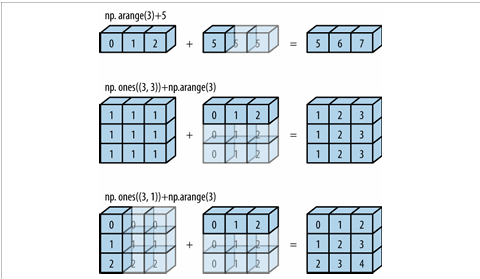

"Las cajas de luz representan los valores transmitidos: nuevamente, esta memoria adicional no se asigna realmente durante la operación, pero puede ser útil conceptualmente imaginar que sí."

**Reglas del Broadcasting**

**El broadcasting en NumPy sigue un conjunto estricto de reglas para determinar la interacción entre dos arrays:**

* Regla 1: Si los dos arrays difieren en el número de dimensiones, la forma del array con menos dimensiones se rellena con unos en el lado izquierdo (leading).

* Regla 2: Si la forma de los dos arrays no coincide en alguna dimensión, el array con forma igual a 1 en esa dimensión se estira para que coincida con la otra forma.

* Regla 3: Si en alguna dimensión los tamaños no coinciden y ninguno es igual a 1, se genera un error.

 Broadcasting example 1

In [50]:
M = np.ones((2,3),dtype=int)
a = np.arange(3)

print(M)
print("\n")
print(a)
print("\n")
print(M.shape)
print(a.shape)

# aplicacion de la regla 1
#M.shape -> (2, 3)
#a.shape -> (1, 3)

#aplicacion de la regla 2
# M.shape -> (2, 3)
# a.shape -> (2, 3)

#Se realiza la operacion 

M + a

[[1 1 1]
 [1 1 1]]


[0 1 2]


(2, 3)
(3,)


array([[1, 2, 3],
       [1, 2, 3]])

 Broadcasting example 2

In [51]:
a = np.arange(3).reshape((3, 1))
b = np.arange(3)

print(f"{a}: {a.shape}")
print(f"{b} : {b.shape}")

# aplicacion de la regla 1
#M.shape -> (3, 1)
#a.shape -> (1,3)

#aplicacion de la regla 2
# M.shape -> (3, 3)
# a.shape -> (3, 3)

a +b

[[0]
 [1]
 [2]]: (3, 1)
[0 1 2] : (3,)


array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

 Broadcasting example 3

In [52]:
M = np.ones((3,2))
a = np.arange(3)

print(M.shape)
print(a.shape)

# aplicacion de la regla 1
#M.shape -> (3, 2)
#a.shape -> (3,)

#aplicacion de la regla 2
# M.shape -> (3, 2)
# a.shape -> (3, 3)




(3, 2)
(3,)


"Ahora nos encontramos con la regla 3: las formas finales no coinciden, por lo que estos dos arrays son incompatibles, como podemos observar al intentar esta operación:"

ValueError                                Traceback (most recent call last)
 <ipython-input-13-9e16e9f98da6> in <module>()----> 1 M + a
 ValueError: operands could not be broadcast together with shapes (3,2) (3,)

**Importante**

"Observa la posible confusión aquí: podrías imaginar hacer que a y M sean compatibles, por ejemplo, rellenando la forma de "a" con unos en el lado derecho en lugar del izquierdo. ¡Pero así no funcionan las reglas de broadcasting! Ese tipo de flexibilidad podría ser útil en algunos casos, pero podría llevar a áreas potenciales de ambigüedad. Si lo que deseas es un relleno en el lado derecho, puedes hacerlo explícitamente mediante la remodelación del array."

In [53]:
a_newdim = a[:,np.newaxis]
a_newdim

array([[0],
       [1],
       [2]])

In [54]:
M + a_newdim

array([[1., 1.],
       [2., 2.],
       [3., 3.]])

"También ten en cuenta que, aunque nos hemos centrado en el operador + aquí, estas reglas de broadcasting se aplican a cualquier ufunc binaria. Por ejemplo, aquí está la función logaddexp(a, b), que calcula log(exp(a) + exp(b)) con mayor precisión que el enfoque ingenuo:"

In [55]:
np.logaddexp(M, a[:, np.newaxis])

array([[1.31326169, 1.31326169],
       [1.69314718, 1.69314718],
       [2.31326169, 2.31326169]])

**El broadcasting en la práctica**

* Las operaciones de broadcasting forman el núcleo de muchos ejemplos que veremos a lo largo de este libro. Ahora veremos un par de ejemplos simples donde pueden ser útiles.

**Centrar un array**

* En la sección anterior, vimos que las ufuncs permiten a un usuario de NumPy eliminar la necesidad de escribir bucles lentos en Python de manera explícita. El broadcasting extiende esta capacidad. Un ejemplo comúnmente visto es centrar un array de datos. Imagina que tienes un array con 10 observaciones, cada una compuesta por 3 valores. Usando la convención estándar

In [56]:
import numpy as np

X = np.random.random((10, 3))  # Creación de un array de 10 filas y 3 columnas con valores aleatorios

#Podemos calcular la media de cada característica utilizando la agregación de media a lo largo de la primera dimensión:
Xmean = X.mean(0)  # Calcula la media a lo largo del eje 0 (columnas)
Xmean

# Centramos el array X restando la media (operación de broadcasting)
X_centered = X - Xmean

# Verificamos que el array centrado tenga una media cercana a cero
X_centered.mean(0)

array([ 4.44089210e-17, -2.77555756e-17, -2.22044605e-17])

**Plotting a two-dimensional function**

* Un lugar donde el broadcasting es muy útil es en la visualización de imágenes basadas en funciones bidimensionales. Si queremos definir una función z = f(x, y), el broadcasting se puede usar para calcular la función en toda la cuadrícula:

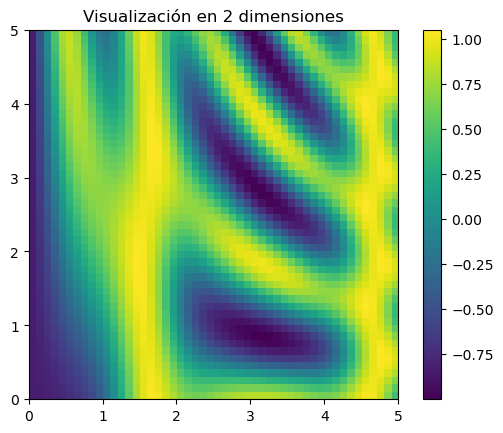

In [66]:
# Creamos arreglos x e y que representan puntos espaciados uniformemente en el intervalo [0, 5]
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 50)[:, np.newaxis]

# Definimos una función z = f(x, y) utilizando broadcasting para calcularla en toda la cuadrícula
z = np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

# Importamos matplotlib para visualización y configuramos el gráfico
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# Creamos un mapa de colores para z
ax = plt.imshow(z, origin='lower', extent=[0, 5, 0, 5], cmap='viridis')
ax = plt.title("Visualización en 2 dimensiones")  # Título del gráfico
ax = plt.colorbar();  # Añadimos una barra de color para representar los valores de z
